## Pulsar Stars classification - Model comparison

### Context:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

The data set shared here was downloaded from [Kaggle](https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star) and it contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

### Content: 
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

* Mean of the integrated profile.
* Standard deviation of the integrated profile.
* Excess kurtosis of the integrated profile.
* Skewness of the integrated profile.
* Mean of the DM-SNR curve.
* Standard deviation of the DM-SNR curve.
* Excess kurtosis of the DM-SNR curve.
* Skewness of the DM-SNR curve.
* Target class: 0-negative, 1-positve

### Load the dataset

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
# Load the dataset and print out the first 5 rows:
df = pd.read_csv('pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Data cleaning and Exploratory Data Analysis 

In [3]:
# Inspect column dtatype and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
# Statistical investigation
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


One thing to notice, all of our variables are numeric and there are negative as well as positive values.

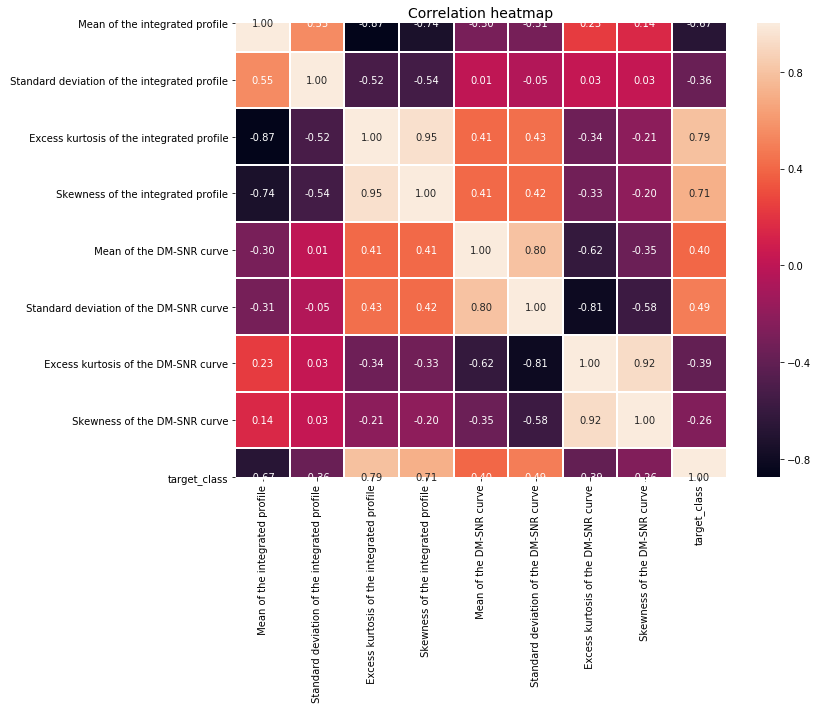

In [5]:
# Let's take a look at the correlation between features:
plt.figure(figsize=(12,10))

sns.heatmap(data=df.corr(),annot=True, linewidths=1, fmt='.2f')
plt.title('Correlation heatmap', fontsize=14)
plt.tight_layout()
plt.show()    

This heatmap gives us a quick overview of our variables and their relationships with the target variable. At first sight, there are a few white colored squares that get my attention.
* 'Excess kurtosis of the integrated profile' and 'Skewness of the integrated profile'
* 'Mean of the DM-SNR curve' and 'Standard deviation of the DM-SNR curve'
* 'Excess kurtosis of the DM-SNR curve' and 'Skewness of the DM-SNR curve'

All cases above show significant correlation between variables. In fact, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Since they pretty much explain one another, we'll drop one of the highly correlated variables in the set.

In [6]:
# Eliminate features that are highly correlated:
df = df.drop([' Excess kurtosis of the integrated profile', 
              ' Mean of the DM-SNR curve', 
              ' Skewness of the DM-SNR curve'], axis=1)

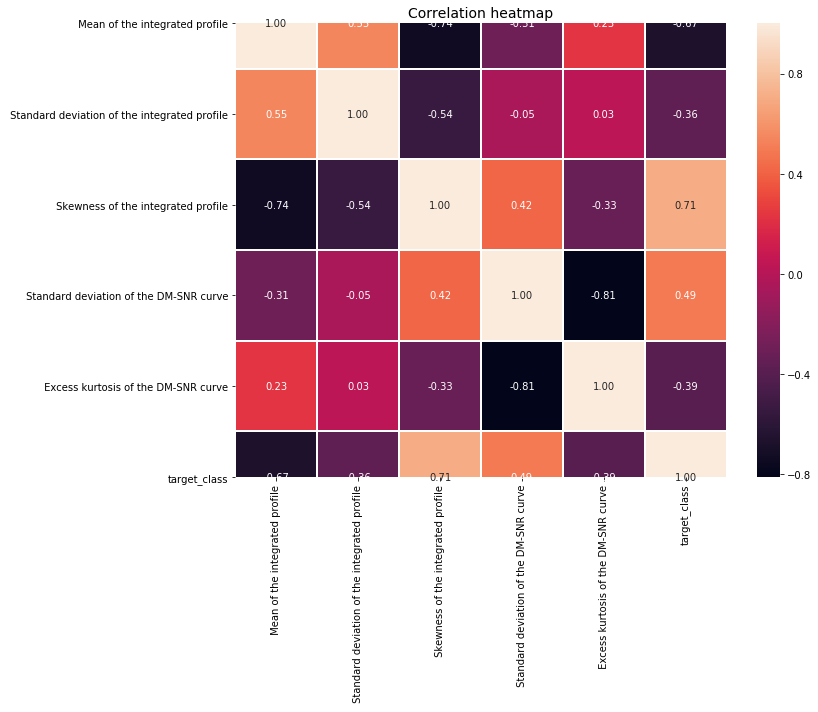

In [7]:
# Let's plot the correlation heatmap again after we dropped the columns:
plt.figure(figsize=(12,10))

sns.heatmap(data=df.corr(),annot=True, linewidths=1, fmt='.2f')
plt.title('Correlation heatmap', fontsize=14)
plt.tight_layout()
plt.show()

That looks a lot better! Interestingly, skewness of the integrated profile is highly correlated with the target calss that we're trying to classify.

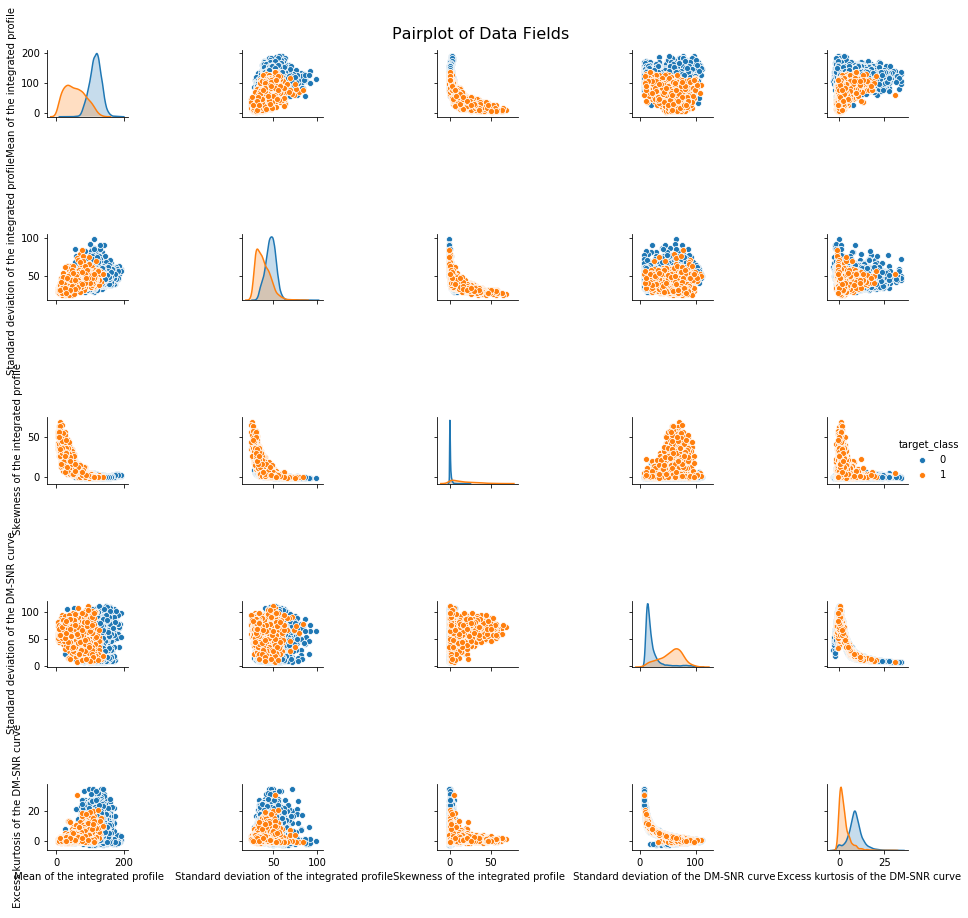

In [8]:
# Use pairplot to ispect the relationship between target and explanatory variables
sns.pairplot(data=df,
             hue='target_class',
             vars=[' Mean of the integrated profile',
                   ' Standard deviation of the integrated profile',
                   ' Skewness of the integrated profile',
                   ' Standard deviation of the DM-SNR curve',
                   ' Excess kurtosis of the DM-SNR curve'])

plt.suptitle('Pairplot of Data Fields',fontsize=16)

plt.tight_layout()
plt.show()  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2001ad90>,
      dtype=object)

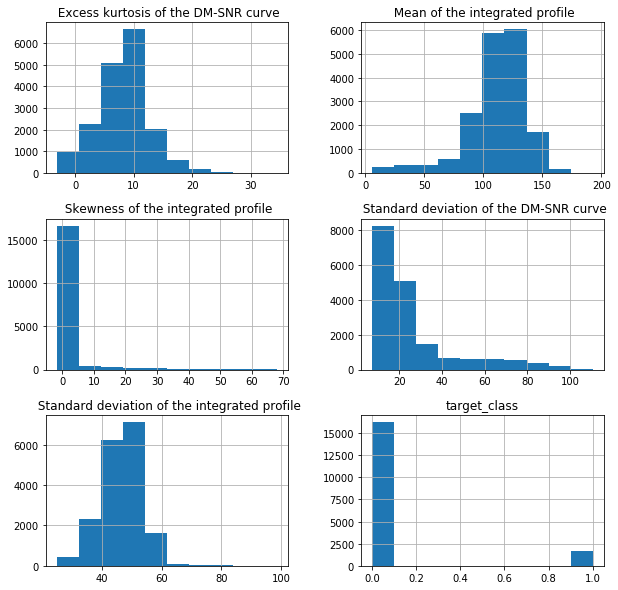

In [9]:
# Let's take a look at variable distribution
df.hist(figsize = (10,10))

It's clear that some features are highly skewed and some look closer to a normal distribution. Notice how the  target class is highly imbalanced? This is an issue that we'll have to address as it can potentially impact the model's predicting capacity.

### Buidling classification models:

In [10]:
# Split variables into target and explanatory variabels:
Y = df['target_class']
X = df.drop('target_class', axis=1)

# Split data into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1359)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13423, 5)
(13423,)
(4475, 5)
(4475,)


In [11]:
# Oversample train set to take into consideration of class imbalance
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 1359) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

# Reassign newly sampled dataset:
X_train = X_train_res
y_train = y_train_res

After OverSampling, the shape of train_X: (24376, 5)
After OverSampling, the shape of train_y: (24376,) 

After OverSampling, counts of label '1': 12188
After OverSampling, counts of label '0': 12188


In [12]:
# Scaling X_train and X_test using StandardScaler:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
# transform 'X_train'
X_train = scaler.fit_transform(X_train)
# transform 'X_test'
X_test = scaler.transform(X_test)

#### Decision tree classification

In [13]:
# Decision tree classification:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=1359)

dtc.fit(X_train,y_train)

y_preds_train = dtc.predict(X_train)
y_preds_test = dtc.predict(X_test)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f}'.format(dtc.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(dtc.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('--- %s seconds ---' % (time.time() - start_time))

R-squared of the model in training set is: 1.000
-----Test set statistics-----
R-squared of the model in test set is: 0.944
Mean absolute error of the prediction is: 0.056
Mean squared error of the prediction is: 0.056
Root mean squared error of the prediction is: 0.236
--- 0.01039886474609375 seconds ---


#### Random frorest classification

In [14]:
# Random forest classification:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(criterion ='entropy', random_state=1359)

rfc.fit(X_train,y_train)

y_preds_train = dtc.predict(X_train)
y_preds_test = dtc.predict(X_test)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f}'.format(rfc.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(rfc.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('--- %s seconds ---' % (time.time() - start_time))

R-squared of the model in training set is: 1.000
-----Test set statistics-----
R-squared of the model in test set is: 0.974
Mean absolute error of the prediction is: 0.056
Mean squared error of the prediction is: 0.056
Root mean squared error of the prediction is: 0.236
--- 0.36684489250183105 seconds ---


#### Naive Bayes Classification

In [15]:
# Naive Bayes Classification:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

nbc.fit(X_train,y_train)

y_preds_train = nbc.predict(X_train)
y_preds_test = nbc.predict(X_test)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f}'.format(nbc.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(nbc.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('--- %s seconds ---' % (time.time() - start_time))

R-squared of the model in training set is: 0.904
-----Test set statistics-----
R-squared of the model in test set is: 0.948
Mean absolute error of the prediction is: 0.052
Mean squared error of the prediction is: 0.052
Root mean squared error of the prediction is: 0.228
--- 0.011655807495117188 seconds ---


#### KNN Classification

In [16]:
# KNN classification:
from sklearn.neighbors import KNeighborsClassifier

rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    knn = KNeighborsClassifier(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_preds_test=knn.predict(X_test) #make prediction on test set
    error = math.sqrt(mse(y_test,y_preds_test)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error) 
    

start_time = time.time() # print out executing time
print('--- %s seconds ---' % (time.time() - start_time))

RMSE value for k=  1 is: 0.22769184311036356
RMSE value for k=  2 is: 0.19831694062421265
RMSE value for k=  3 is: 0.23777365886313398
RMSE value for k=  4 is: 0.20713528896100947
RMSE value for k=  5 is: 0.23635972962353272
RMSE value for k=  6 is: 0.22071493786982946
RMSE value for k=  7 is: 0.2373032851900942
RMSE value for k=  8 is: 0.22172508016276452
RMSE value for k=  9 is: 0.23683197730640249
RMSE value for k=  10 is: 0.22172508016276452
--- 6.508827209472656e-05 seconds ---


In [17]:
# Since k=2 gives us the best score, let implement KNN classifier with k=2
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train,y_train)

y_preds_train = knn.predict(X_train)
y_preds_test = knn.predict(X_test)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f}'.format(knn.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(knn.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('--- %s seconds ---' % (time.time() - start_time))

R-squared of the model in training set is: 0.991
-----Test set statistics-----
R-squared of the model in test set is: 0.961
Mean absolute error of the prediction is: 0.039
Mean squared error of the prediction is: 0.039
Root mean squared error of the prediction is: 0.198
--- 1.7278130054473877 seconds ---


#### Support Vector Classification 

In [18]:
# Support Vector Machine model:
from sklearn.svm import SVC

svm = SVC(random_state=1359)

svm.fit(X_train,y_train)

y_preds_train = svm.predict(X_train)
y_preds_test = svm.predict(X_test)

start_time = time.time()

print('R-squared of the model in training set is: {:.3f}'.format(svm.score(X_train, y_train)))
print('-----Test set statistics-----')
print('R-squared of the model in test set is: {:.3f}'.format(svm.score(X_test, y_test)))
print('Mean absolute error of the prediction is: {:.3f}'.format(mean_absolute_error(y_test, y_preds_test)))
print('Mean squared error of the prediction is: {:.3f}'.format(mse(y_test, y_preds_test)))
print('Root mean squared error of the prediction is: {:.3f}'.format(rmse(y_test, y_preds_test)))
print('--- %s seconds ---' % (time.time() - start_time))

R-squared of the model in training set is: 0.944
-----Test set statistics-----
R-squared of the model in test set is: 0.973
Mean absolute error of the prediction is: 0.027
Mean squared error of the prediction is: 0.027
Root mean squared error of the prediction is: 0.163
--- 2.6149749755859375 seconds ---


### Conclusion

All of the above models gave us pretty good scores and low errors! However, there a few models(Random Forest, KNN and Support Vector) that outperform others. However, these models are more computational demanding as they take more time to execute. This data set is quite small, that's why it only takes a few seconds. Imagine a data set with millions of records, computational capacity and running time will be more critical. 